In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./bikes_data_transformed.csv')

In [3]:
df.head()

,Unnamed: 0,Company,Origin,Model,CC,Horsepower,Torque,Transmission,Drivetrain,Seating,Price(Lakhs),Year,Looks,Body,Engine,Cylinders
0,0,Aprilia,Italy,RS 660,659.0,100.0,67.0,6-speed Manual,Chain,2,10.99,2021,Sport,Naked,Parallel-twin,2
1,1,Aprilia,Italy,Tuono 660,659.0,100.0,67.0,6-speed Manual,Chain,2,11.99,2021,Sport,Naked,Parallel-twin,2
2,2,Aprilia,Italy,RS 125,124.9,15.0,12.0,6-speed Manual,Chain,2,4.49,2022,Sport,Racing,Single-cylinder,1
3,3,Aprilia,Italy,Shiver 900,896.0,95.0,90.0,6-speed Manual,Shaft,2,13.99,2022,Adventure,Naked,V-twin,2
4,4,Aprilia,Italy,Tuono 1100,1077.0,175.0,121.0,6-speed Manual,Shaft,2,19.99,2022,Adventure,Naked,V-twin,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    361 non-null    int64  
 1   Company       361 non-null    object 
 2   Origin        361 non-null    object 
 3   Model         361 non-null    object 
 4   CC            361 non-null    float64
 5   Horsepower    361 non-null    float64
 6   Torque        361 non-null    float64
 7   Transmission  361 non-null    object 
 8   Drivetrain    361 non-null    object 
 9   Seating       361 non-null    int64  
 10  Price(Lakhs)  361 non-null    float64
 11  Year          361 non-null    object 
 12  Looks         361 non-null    object 
 13  Body          361 non-null    object 
 14  Engine        361 non-null    object 
 15  Cylinders     361 non-null    int64  
dtypes: float64(4), int64(3), object(9)
memory usage: 45.2+ KB


In [5]:
df.nunique()

Unnamed: 0      361
Company          75
Origin           15
Model           344
CC              125
Horsepower      187
Torque          162
Transmission     10
Drivetrain        7
Seating           3
Price(Lakhs)    207
Year              5
Looks            49
Body             55
Engine           62
Cylinders         5
dtype: int64

In [6]:
df.describe()

,Unnamed: 0,CC,Horsepower,Torque,Seating,Price(Lakhs),Cylinders
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,180.146814,484.260776,89.611551,52.916510,1.620499,7.044266,1.393352
std,104.573595,462.769019,145.293381,54.966742,0.491620,8.960971,0.711306
min,0.000000,7.200000,3.000000,3.500000,1.000000,0.140000,0.000000
25%,90.000000,125.000000,17.500000,13.700000,1.000000,1.320000,1.000000
50%,180.000000,295.000000,44.000000,28.000000,2.000000,3.200000,1.000000
75%,270.000000,650.000000,110.000000,80.000000,2.000000,11.000000,2.000000
max,361.000000,2500.000000,2077.700000,301.900000,3.000000,82.850000,4.000000


<AxesSubplot:>

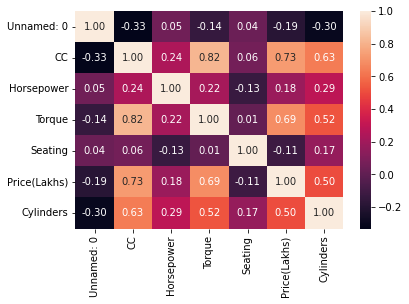

In [7]:
sns.heatmap(df.corr(),annot=True,fmt='.2f')

Columns 'CC' and 'Torque' are strongly related with '0.82'.
Columns 'CC' and 'Torque' are also related strongly with column 'Price(Lakh)'.

##### Country

In [8]:
df.Origin.nunique()

15

data has bikes originated from <strong>15</strong> different countries.

In [9]:
by_origin = df.groupby('Origin')['Company'].nunique().reset_index()

In [10]:
by_origin = by_origin.sort_values(by='Company',ascending=False)

In [11]:
by_origin

,Origin,Company
7,Italy,18
2,China,13
6,India,12
13,United Kingdom,8
14,United States,6
8,Japan,5
12,Taiwan,3
0,Austria,2
4,France,2
9,South Korea,2


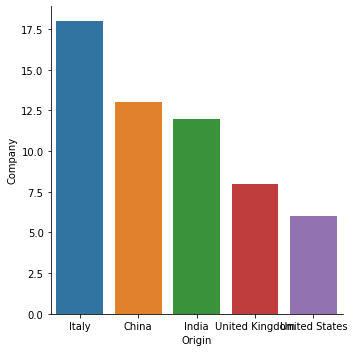

In [12]:
sns.catplot(x='Origin',y='Company',data=by_origin[:5],kind='bar')

Italy has most car companies originated(18) followed by China(13) and India(12).

##### Company

In [13]:
df.Company.nunique()

75

The data have <strong>75</strong> different countries.

In [14]:
df.Company.value_counts()

Benelli             16
Husqvarna           12
Mutt Motorcycles    11
Triumph              9
Genuine Scooters     9
                    ..
Derbi                1
Ontrack              1
Ampere               1
Hero Electric        1
Fantic               1
Name: Company, Length: 75, dtype: int64

The data has most bikes from Benelli(16) followed by Husqvarna(12) and Mutt Motorcycles(11) resp.

##### CC

In [15]:
df.CC.max()

2500.0

In [16]:
df[df.CC== df.CC.max()][['Company','Model','Origin']]

,Company,Model,Origin
148,Triumph,Rocket 3 R,United Kingdom


<strong>Triumph</strong> from company <strong>'Rocket 3 R (UK)'</strong> have highest CC (2500).

In [17]:
df.CC.min()

7.2

In [18]:
df[df.CC == df.CC.min()][['Company','Model','Origin']]

,Company,Model,Origin
274,Zero Motorcycles,Zero S,United States
278,Zero Motorcycles,Zero FX,United States


The Electric bikes from company <strong>'Zero Motorcycles (USA)'</strong> have lowest CC (7.2 cc).

<AxesSubplot:xlabel='CC', ylabel='Count'>

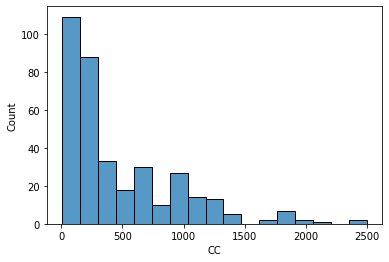

In [19]:
sns.histplot(df.CC)

The bigger chunk of the data is less than 500 CC.

Horsepower

In [20]:
df.Horsepower.max()

2077.7

In [21]:
df[df.Horsepower == df.Horsepower.max()][['Company','Model','Origin']]

,Company,Model,Origin
198,Yamaha,MT-10,Japan


The <strong>MT-10</strong> from company <strong>'Yamaha (Japan)'</strong> is bike with highest horsepower (2078 hp)

In [22]:
df.Horsepower.min()

3.0

In [23]:
df[df.Horsepower == df.Horsepower.min()][['Company','Model','Origin']]

,Company,Model,Origin
320,Super Soco,TS Street Hunter,China


The elctric bike <strong>TS Street Hunter</strong> from company <strong>'Super Soco (China)'</strong> has lowest horsepower (3 hp)

<AxesSubplot:xlabel='Horsepower', ylabel='Count'>

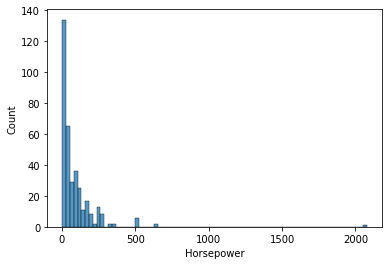

In [24]:
sns.histplot(df.Horsepower)

The largest chunk is between 0 to 250 hp.

##### Torque

In [25]:
df.Torque.max()

301.9

In [26]:
df[df.Torque == df.Torque.max()][['Company','Model','Origin']]

,Company,Model,Origin
357,Energica Motor Company,EGO+,Italy
358,Energica Motor Company,Eva Ribelle RS,Italy


The bikes from company <strong>'Energica Motor Company(Italy)'</strong> produce highest torque (302).

In [27]:
df.Torque.min()

3.5

In [28]:
df[df.Torque == df.Torque.min()][['Company','Model','Origin']]

,Company,Model,Origin
290,Genuine Scooters,Buddy 50,Taiwan
297,Genuine Scooters,Rattler 50,Taiwan


The scooters from <strong>'Genuine Scooters(Taiwan)'</strong> have the least torque (3.5)

##### Transmission

In [29]:
df.Transmission.nunique()

10

In [30]:
df.Transmission.value_counts()

6-speed Manual       162
Manual                50
CVT                   46
5-speed Manual        45
Automatic             36
4-speed Manual        12
6-speed automatic      4
Single Speed           2
Mid-drive Motor        2
Hub Motor              2
Name: Transmission, dtype: int64

Text(0, 0.5, 'Transmission Type')

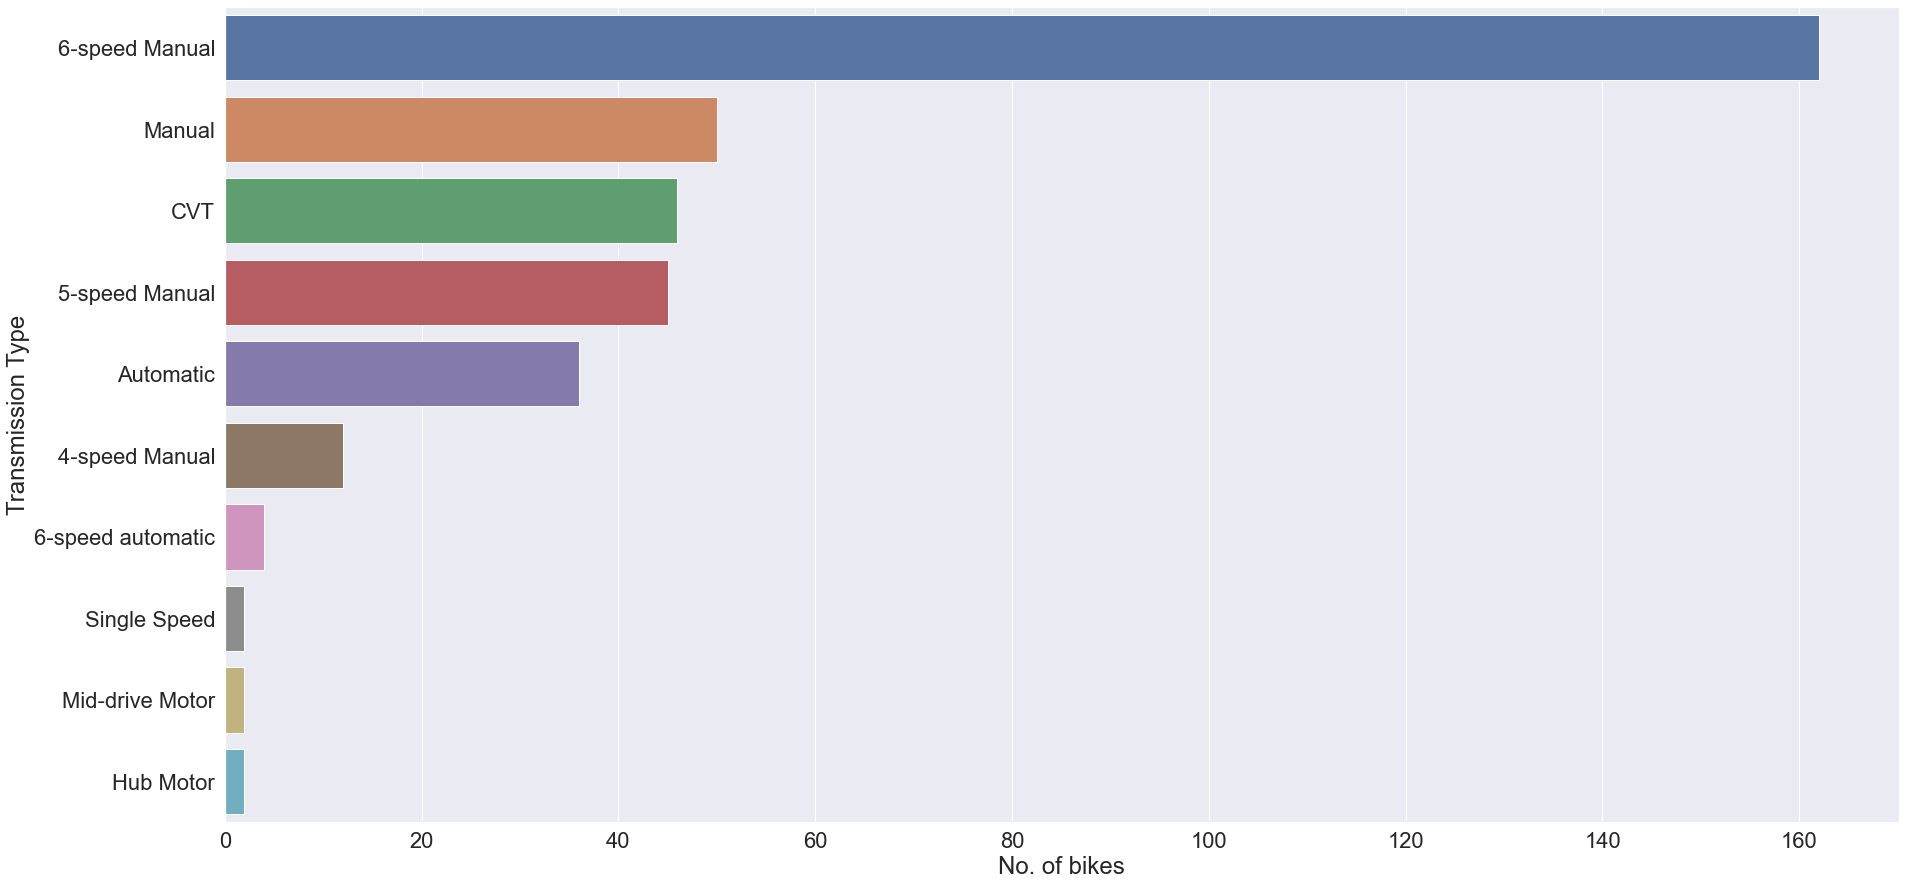

In [31]:
plt.figure(figsize=(30,15))
sns.set_theme(font_scale = 2)
sns.barplot(x=df.Transmission.value_counts(),y=df.Transmission.value_counts().index,orient='horizontal')
plt.xlabel('No. of bikes')
plt.ylabel('Transmission Type')

<strong>6-Speed Manual</strong> is the most preferred Transmission type. 

##### Drivetrain

In [32]:
df.Drivetrain.nunique()

7

In [33]:
df.Drivetrain.value_counts()

Chain        225
Automatic     35
Shaft         27
Belt          26
CVT           18
Electric      16
Other         14
Name: Drivetrain, dtype: int64

<AxesSubplot:xlabel='Drivetrain'>

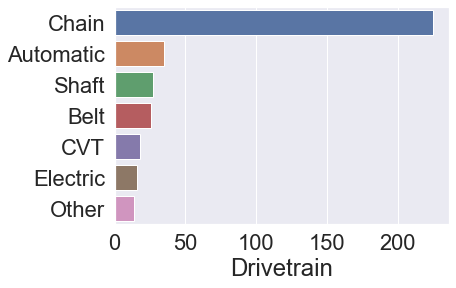

In [34]:
sns.barplot(x=df.Drivetrain.value_counts(),y=df.Drivetrain.value_counts().index)

Most companies prefer <strong>Chain Drivetrain</strong> for bikes.

##### Cylinders

In [35]:
df.Cylinders.nunique()

5

In [36]:
df.Cylinders.value_counts()

1    253
2     82
3     14
4     11
0      1
Name: Cylinders, dtype: int64

In [37]:
df[df.Cylinders == 0]

,Unnamed: 0,Company,Origin,Model,CC,Horsepower,Torque,Transmission,Drivetrain,Seating,Price(Lakhs),Year,Looks,Body,Engine,Cylinders
160,160,Vespa,Italy,Elettrica,70.0,5.4,76.2,CVT,Electric,2,1.1,2022,"Modern, stylish",Scooter,Electric,0


Most bikes have one-cylinder while <strong>Elttrica</strong> from <strong>Vespa(Italy)</strong> is with zero.

##### Seating

In [38]:
df.Seating.nunique()

3

In [39]:
df.Seating.value_counts()

2    222
1    138
3      1
Name: Seating, dtype: int64

In [40]:
df[df.Seating == 3]

,Unnamed: 0,Company,Origin,Model,CC,Horsepower,Torque,Transmission,Drivetrain,Seating,Price(Lakhs),Year,Looks,Body,Engine,Cylinders
227,227,Peugeot,France,Metropolis 400,399.0,36.0,38.0,Automatic,CVT,3,2.4,2023,Futuristic,Scooter,Single-cylinder,1


Most bikes are Two-seaters while <strong>Metropolis 400</strong> from <strong>Peageot(France)</strong> is a 3-seater.

##### Year

In [41]:
df.Year.nunique()

5

In [42]:
df.Year.value_counts()

2023     215
2022      90
<2020     35
2020      14
2021       7
Name: Year, dtype: int64

The data has mostly 2023 produced bikes.

##### Price(Lakh)

In [43]:
df['Price(Lakhs)'].max()

82.85

In [44]:
df[df['Price(Lakhs)'] == df['Price(Lakhs)'].max()]

,Unnamed: 0,Company,Origin,Model,CC,Horsepower,Torque,Transmission,Drivetrain,Seating,Price(Lakhs),Year,Looks,Body,Engine,Cylinders
46,46,Confederate,United States,X132 Hellcat Combat Fighter,2163.0,227.0,194.5,6-speed Manual,Belt,1,82.85,2023,Modern,Fighter,V-twin,2


In [45]:
df['Price(Lakhs)'].min()

0.14

In [46]:
df[df['Price(Lakhs)']==df['Price(Lakhs)'].min()]

,Unnamed: 0,Company,Origin,Model,CC,Horsepower,Torque,Transmission,Drivetrain,Seating,Price(Lakhs),Year,Looks,Body,Engine,Cylinders
228,228,Ontrack,India,Brutus Single Speed MTB 29,29.0,25.0,25.0,Single Speed,Other,1,0.14,2023,Rugged,Mountain Bike,2,1


<strong>X132 Hellcat Combat Fighter</strong> from <strong>Confederate(USA)</strong> is the most expensive bike (82.84 Lakhs) while <strong>Brutus Single Speed MTB 29</strong> from <strong>Ontrack(India)</strong> is the least expensive (14000 Rs.) as it is a bicycle not bike.

<AxesSubplot:xlabel='Price(Lakhs)', ylabel='Count'>

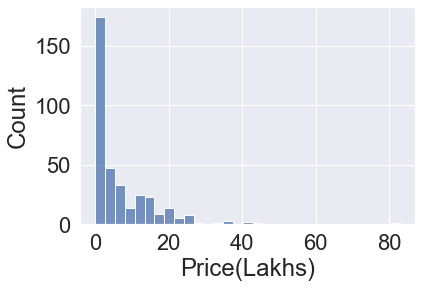

In [47]:
sns.histplot(df['Price(Lakhs)'])

Major chunk of the data has price less than 10 lakhs.

In [48]:
price_by_company = df.groupby('Company')['Price(Lakhs)'].mean().reset_index().sort_values(by='Price(Lakhs)',ascending=False)

In [49]:
price_by_company

,Company,Price(Lakhs)
16,Confederate,56.586667
51,Norton,27.740000
26,Harley-Davidson,27.257778
20,Energica Motor Company,23.530000
44,MV Agusta,21.780000
...,...,...
27,Hero,0.798333
1,Aeon,0.587500
24,Genuine Scooters,0.550000
32,Indian,0.216000


Let's visualize above chart in terms of Top 5 most and least average prices by company.

<AxesSubplot:xlabel='Price(Lakhs)', ylabel='Company'>

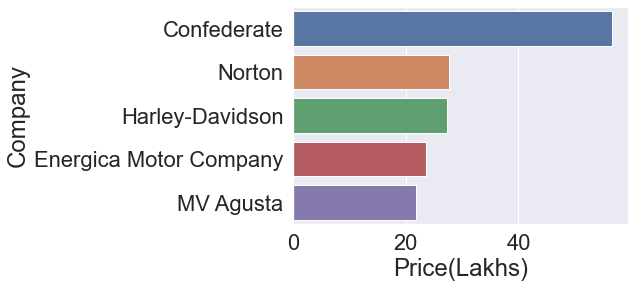

In [50]:
sns.barplot(y='Company',x='Price(Lakhs)',data=price_by_company[:5],orient ='horizontal')

<AxesSubplot:xlabel='Price(Lakhs)', ylabel='Company'>

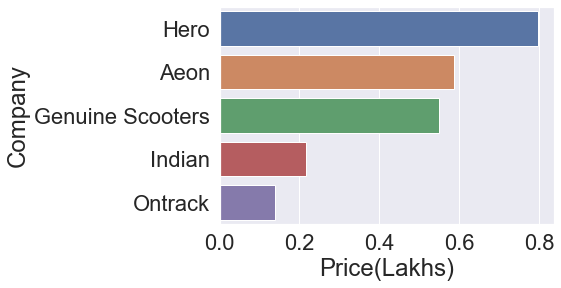

In [51]:
sns.barplot(y='Company',x='Price(Lakhs)',data=price_by_company[-5:],orient ='horizontal')

In [55]:
price_by_year = df.groupby('Year')['Price(Lakhs)'].mean().reset_index().sort_values(by='Price(Lakhs)')

<Figure size 2880x1440 with 0 Axes>

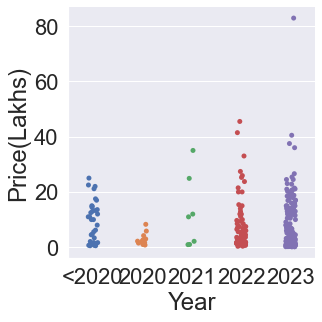

In [59]:
sns.catplot(x='Year',y='Price(Lakhs)',data=df,kind='strip',order=['<2020','2020','2021','2022','2023'])

In [56]:
price_by_year

,Year,Price(Lakhs)
0,2020,2.770000
3,2023,6.863349
2,2022,6.890778
4,<2020,9.183714
1,2021,12.425714


The average price for the bikes of <strong>2021</strong> is highest(12.42 lakhs). While lowest for year <strong>2020</strong> (2.77 Lakhs).